In [4]:
# Created: 20250103

In [1]:
import pyutil as pyu
pyu.get_local_pyinfo()

'conda env: ml312-2024; pyv: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:27:36) [GCC 11.2.0]'

In [2]:
print(pyu.ps2("requests"))

requests==2.32.3



[*********************100%***********************]  1 of 1 completed


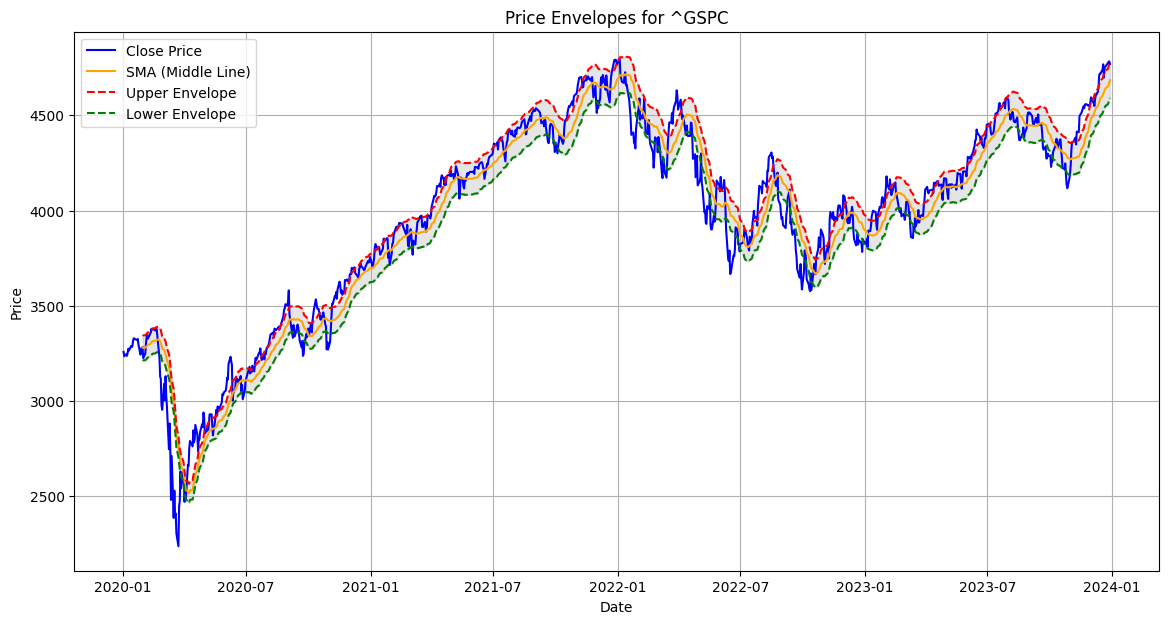

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Download historical data
symbol = "^GSPC"  # S&P 500 as an example
start = "2020-01-01"
end = "2023-12-31"
data = yf.download(symbol, start=start, end=end)

# Step 2: Calculate Price Envelopes
def price_envelopes(data, sma_window=20, percentage=0.02):
    # Calculate Simple Moving Average (SMA)
    data['SMA'] = data['Close'].rolling(window=sma_window).mean()
    
    # Calculate Upper and Lower Envelopes
    data['Upper Envelope'] = data['SMA'] * (1 + percentage)
    data['Lower Envelope'] = data['SMA'] * (1 - percentage)
    
    return data

# Apply the function
data = price_envelopes(data)

# Step 3: Plot Price Envelopes
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['SMA'], label='SMA (Middle Line)', color='orange', linestyle='-')
plt.plot(data['Upper Envelope'], label='Upper Envelope', color='red', linestyle='--')
plt.plot(data['Lower Envelope'], label='Lower Envelope', color='green', linestyle='--')
plt.fill_between(data.index, data['Lower Envelope'], data['Upper Envelope'], color='gray', alpha=0.2)
plt.title(f'Price Envelopes for {symbol}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [2]:
def show_price_envelopes(symbol):

    start = "2020-01-01"
    end = "2023-12-31"
    data = yf.download(symbol, start=start, end=end)
    
    # Apply the function
    data = price_envelopes(data)
    
    # Step 3: Plot Price Envelopes
    plt.figure(figsize=(14, 7))
    plt.plot(data['Close'], label='Close Price', color='blue')
    plt.plot(data['SMA'], label='SMA (Middle Line)', color='orange', linestyle='-')
    plt.plot(data['Upper Envelope'], label='Upper Envelope', color='red', linestyle='--')
    plt.plot(data['Lower Envelope'], label='Lower Envelope', color='green', linestyle='--')
    plt.fill_between(data.index, data['Lower Envelope'], data['Upper Envelope'], color='gray', alpha=0.2)
    plt.title(f'Price Envelopes for {symbol}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

[*********************100%***********************]  1 of 1 completed


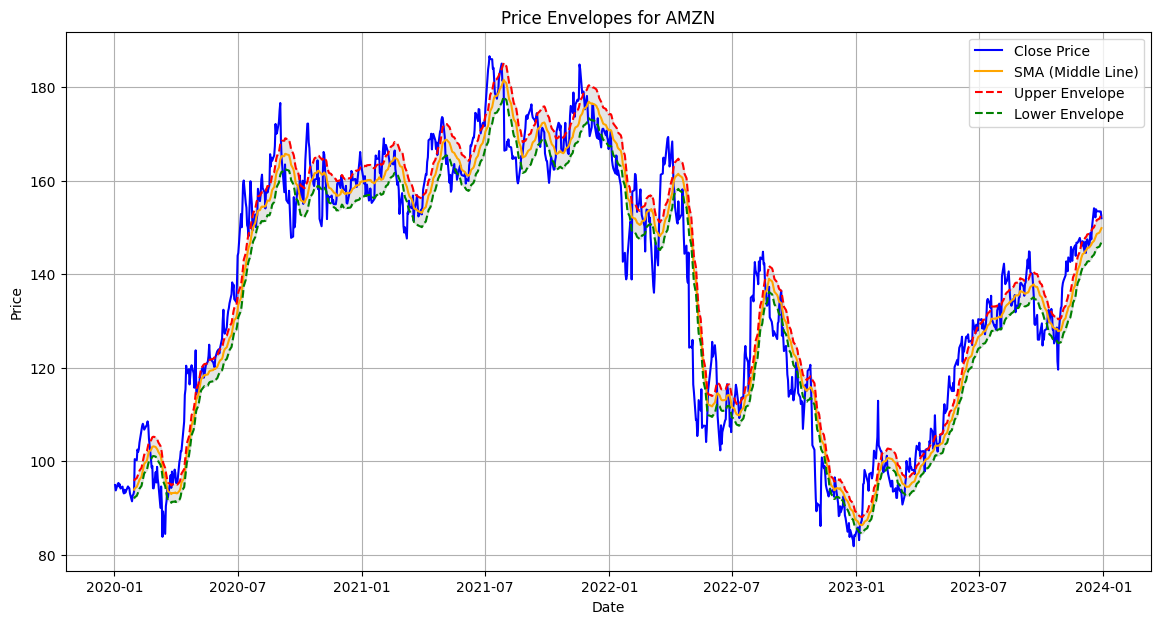

In [3]:
show_price_envelopes("AMZN")